In [21]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")
data
print(data.info())

#Data imported correctly since we have 149316 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_31123/2765086427.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")


We will keep only workers in the cathegory: Medial and health services manager. 
The Census Code is: 0350
The SOC CODE is 11-9111

In [16]:
filtered_data = data[(data['occ2012'] >= 2600) & (data['occ2012'] <= 2920)]
summary = filtered_data.describe()
summary_code = filtered_data['occ2012'].describe()

print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2315 entries, 94 to 149266
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2315 non-null   int64  
 1   hhid        2315 non-null   int64  
 2   intmonth    2315 non-null   object 
 3   stfips      2315 non-null   object 
 4   weight      2315 non-null   float64
 5   earnwke     2315 non-null   float64
 6   uhours      2315 non-null   int64  
 7   grade92     2315 non-null   int64  
 8   race        2315 non-null   int64  
 9   ethnic      208 non-null    float64
 10  age         2315 non-null   int64  
 11  sex         2315 non-null   int64  
 12  marital     2315 non-null   int64  
 13  ownchild    2315 non-null   int64  
 14  chldpres    2315 non-null   int64  
 15  prcitshp    2315 non-null   object 
 16  state       2315 non-null   object 
 17  ind02       2315 non-null   object 
 18  occ2012     2315 non-null   int64  
 19  class       2315 non-null   o

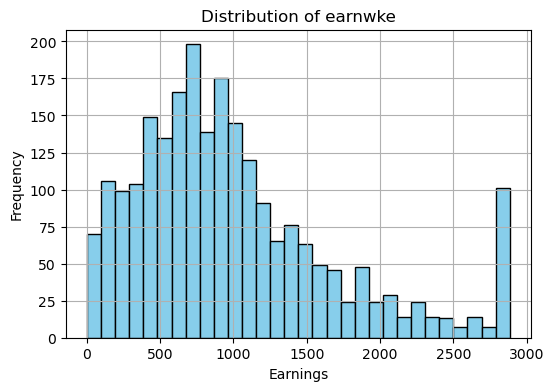

In [25]:
earnwke_data = filtered_data['earnwke']

# Plotting the distribution using a histogram
plt.figure(figsize=(6, 4))
plt.hist(earnwke_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of earnwke')
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
# Assume 'earnings_per_hour' is the target variable
target = 'earnings_per_hour'
features = filtered_data.columns[filtered_data.columns != target]  # Select all other columns as features

X = filtered_data["earnwke"]
y = filtered_data["earnwke"]


In [ ]:
# Model 1 - Simplest Model
X_model1 = X[['feature1', 'feature2']]  # Define the simplest features

# Model fitting
model1 = LinearRegression()
model1.fit(X_model1, y)

# Model 2, 3, 4 - Increasing Complexity
# Include more features in each subsequent model

# Evaluation Metrics Calculation
models = [model1]  # Store models for evaluation

for model in models:
    y_pred = model.predict(X)  # Predict on full sample
    
    # Calculate RMSE for the full sample
    rmse_full = np.sqrt(mean_squared_error(y, y_pred))
    
    # Cross-validation for RMSE
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5).mean())
    
    # BIC Calculation
    n = len(y)
    k = len(model.coef_) + 1  # Number of predictors + intercept
    bic = n * np.log(mean_squared_error(y, y_pred)) + k * np.log(n)
    
    print(f"RMSE (Full Sample): {rmse_full}")
    print(f"Cross-validated RMSE: {cv_rmse}")
    print(f"BIC: {bic}")
